# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [120]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [121]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [122]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [123]:
# Combine the data into a single DataFrame
mouse_data_df = pd.merge(study_results, mouse_metadata, how="left", on = "Mouse ID")

# Display the data table for preview
mouse_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [124]:
# Checking the number of mice.
mice_data = mouse_data_df["Mouse ID"].nunique()
mice_data

249

In [125]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mice_time = mouse_data_df[mouse_data_df[["Mouse ID", "Timepoint"]].duplicated()]
mice_time_id = mice_time["Mouse ID"].unique()
mice_time_id

array(['g989'], dtype=object)

In [126]:
# Optional: Get all the data for the duplicate mouse ID.
all_mice = mouse_data_df.loc[mouse_data_df["Mouse ID"] == mice_time_id[0]]
all_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [127]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = mouse_data_df[mouse_data_df["Mouse ID"].isin(mice_time_id)==False]
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [128]:
# Checking the number of mice in the clean DataFrame.
check_clean_data = clean_data["Mouse ID"].nunique()
# check_number_of_mice = len(check_clean_data)
# check_number_of_mice
check_clean_data

248

## Summary Statistics

In [129]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_data = clean_data.set_index(["Drug Regimen"])
drug_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,0,45.000000,0,Female,9,22
Ketapril,f932,0,45.000000,0,Male,15,29
Ketapril,g107,0,45.000000,0,Female,2,29
Ketapril,a457,0,45.000000,0,Female,11,30
Ketapril,c819,0,45.000000,0,Male,21,25
...,...,...,...,...,...,...,...
Capomulin,r944,45,41.581521,2,Male,12,25
Capomulin,u364,45,31.023923,3,Male,18,17
Ceftamin,p438,45,61.433892,1,Female,11,26


In [130]:
drug_data.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [131]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_data = clean_data.set_index(["Drug Regimen"])

# Assuming 'Tumor Volume (mm3)' is the correct column name:
correct_column_name = 'Tumor Volume (mm3)'

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

group_drug_data = drug_data.groupby("Drug Regimen")

drug_mean = group_drug_data[correct_column_name].mean()
drug_median = group_drug_data[correct_column_name].median()
drug_var = group_drug_data[correct_column_name].var()
drug_std = group_drug_data[correct_column_name].std()
drug_sem = group_drug_data[correct_column_name].sem()


# # Assemble the resulting series into a single summary DataFrame.

drug_summary_df = pd.DataFrame({"Mean Tumor Volume": drug_mean, 
                                "Median Tumor Volume": drug_median,
                                "Tumor Volume Variance": drug_var,
                                "Tumor Volume Std. Dev.": drug_std,
                                "Tumor Volume Std. Err.": drug_sem})

drug_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [132]:
# Ensure the column name is correct
correct_column_name = "Tumor Volume (mm3)"

# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
static_summary_df = drug_data.groupby(["Drug Regimen"])[[correct_column_name]].agg(["mean", "median", "var", "std", "sem"])

# Display the summary DataFrame
static_summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [133]:
# Filter the DataFrame 
time_and_drug = clean_data[["Drug Regimen", "Timepoint"]]
time_and_drug

,Drug Regimen,Timepoint
0,Capomulin,0
1,Ketapril,0
2,Ketapril,0
3,Ketapril,0
4,Ketapril,0
...,...,...
1888,Capomulin,45
1889,Capomulin,45
1890,Ceftamin,45
1891,Placebo,45


In [134]:
# Group by "Drug Regimen" and count the number of occurrences of "Mouse ID"
drug_counts = time_and_drug["Drug Regimen"].value_counts()
drug_counts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

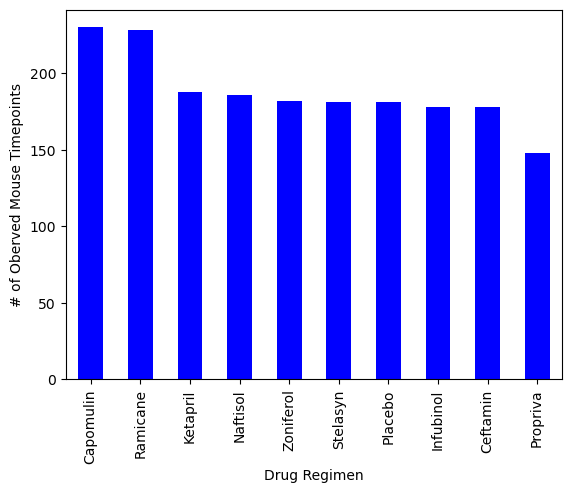

In [135]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts.plot(kind="bar", color = "b")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Oberved Mouse Timepoints")
plt.show()

In [136]:
female_V_male = clean_data["Sex"].value_counts()
female_V_male

Sex
Male      958
Female    922
Name: count, dtype: int64

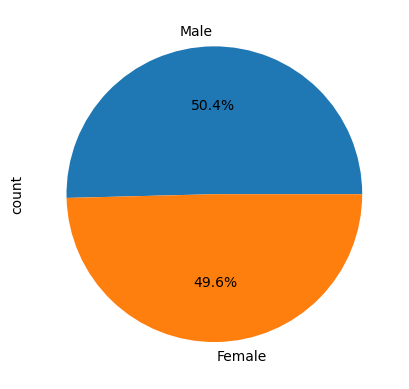

In [137]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
female_V_male = clean_data[["Mouse ID","Sex"]].drop_duplicates()["Sex"].value_counts()

# Get the unique mice with their gender
Sex = ["Female", "Male"]
female_V_male.plot(kind="pie", autopct="%1.1f%%", ylabel="count")

# Make the pie chart
plt.show()

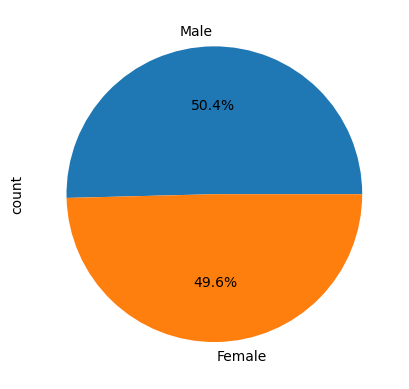

In [138]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
labels = female_V_male.index.values
size = female_V_male.values


# Get the unique mice with their gender
plt.ylabel("count")
plt.pie(size, labels=labels, autopct="%1.1f%%")


# Make the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [140]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
each_mouse = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin") | (clean_data["Drug Regimen"] == "Ramicane") |
                                        (clean_data["Drug Regimen"] == "Infubinol") |(clean_data["Drug Regimen"] == "Ceftamin") ]


#Start by getting the last (greatest) timepoint for each mouse
last_tp = each_mouse.groupby(["Drug Regimen","Mouse ID"]).last()
new_last_tp = last_tp.reset_index()


last_mouse=new_last_tp[["Drug Regimen", "Tumor Volume (mm3)"]]
last_mouse

capomulin_df = last_mouse.loc[last_mouse["Drug Regimen"] == "Capomulin"]
capomulin_df

ramicane_df = last_mouse.loc[last_mouse["Drug Regimen"] == "Ramicane"]
ramicane_df

infubinol_df = last_mouse.loc[last_mouse["Drug Regimen"] == "Infubinol"]
infubinol_df

ceftamin_df = last_mouse.loc[last_mouse["Drug Regimen"] == "Ceftamin"]
ceftamin_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_df = pd.DataFrame({"Capomulin": capomulin_df["Tumor Volume (mm3)"],
         "Ramicane": ramicane_df["Tumor Volume (mm3)"],
          "Infubinol": infubinol_df["Tumor Volume (mm3)"],
          "Ceftamin": ceftamin_df["Tumor Volume (mm3)"]})
last_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,NaN,NaN,NaN
1,38.939633,NaN,NaN,NaN
2,30.485985,NaN,NaN,NaN
3,37.074024,NaN,NaN,NaN
4,40.159220,NaN,NaN,NaN
...,...,...,...,...
95,NaN,30.276232,NaN,NaN
96,NaN,40.667713,NaN,NaN
97,NaN,43.166373,NaN,NaN
98,NaN,44.183451,NaN,NaN


In [143]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = []
for drug in last_mouse["Drug Regimen"]: 
    if drug not in treatment:
        treatment.append(drug)
treatment

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
upperQ = []
lowerQ = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment:
    quartiles = last_df[drug].quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    print(f"IQR for {drug}: {iqr}")

    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds
    bounds_upper = upperq + (1.5 * iqr)
    bounds_lower = lowerq - (1.5 * iqr)
# Determine outliers
    outliers = last_df[(last_df[drug] < bounds_lower) | (last_df[drug] > bounds_upper)][drug]

    print(f"{drug}'s potential outliers:")
    print(outliers)


IQR for Capomulin: 7.781863460000004
Capomulin's potential outliers:
Series([], Name: Capomulin, dtype: float64)
IQR for Ceftamin: 15.577752179999997
Ceftamin's potential outliers:
Series([], Name: Ceftamin, dtype: float64)
IQR for Infubinol: 11.477135160000003
Infubinol's potential outliers:
55    36.321346
Name: Infubinol, dtype: float64
IQR for Ramicane: 9.098536719999998
Ramicane's potential outliers:
Series([], Name: Ramicane, dtype: float64)


Text(0.5, 0, '')

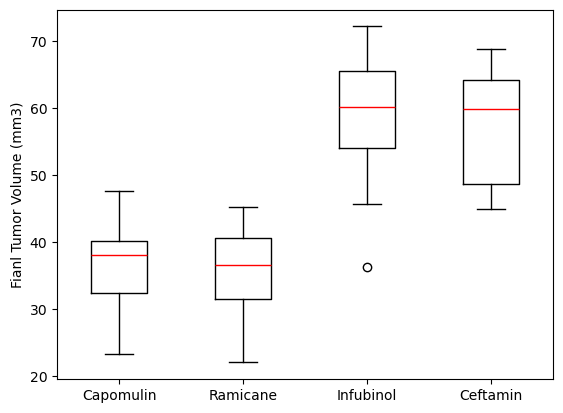

In [144]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
box_plot = last_df.boxplot(grid= False, color= dict(boxes="k", whiskers="k", medians="r"))
box_plot.set_ylabel("Fianl Tumor Volume (mm3)")
box_plot.set_xlabel("")

## Line and Scatter Plots

In [172]:
line_df = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin") & (clean_data["Mouse ID"] == "l509")]
line_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


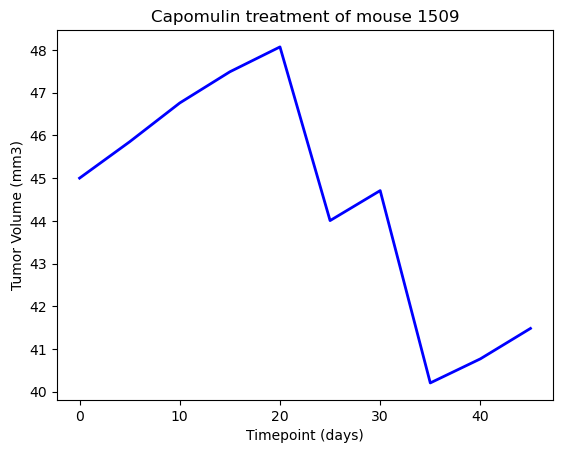

In [173]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_df = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin") & (clean_data["Mouse ID"] == "l509")]
line_df.head()


# Convert data to numeric values
x_axis = line_df["Timepoint"]
tumorsize = line_df["Tumor Volume (mm3)"]

# Plotting
plt.plot(x_axis, tumorsize, linewidth=2, markersize=15,color="b", label="Fahreneit")
plt.title("Capomulin treatment of mouse 1509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


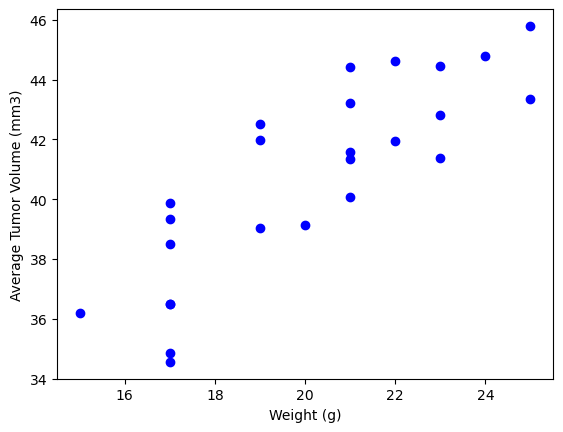

In [179]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Assuming clean_data is already loaded and cleaned
clean_data = clean_data.dropna(subset=["Timepoint", "Tumor Volume (mm3)", "Weight (g)"])

# Generate a subset for the entire Capomulin regimen
capomulin_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]

# Select only the relevant columns
capomulin_df = capomulin_df[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

# Group by Mouse ID and calculate the mean of numeric columns
scatter_plot_df = capomulin_df.groupby("Mouse ID").mean()

# Extract data for plotting
mouse_weight = scatter_plot_df["Weight (g)"]
tumor_volume = scatter_plot_df["Tumor Volume (mm3)"]

# Plotting
plt.scatter(mouse_weight, tumor_volume, c='blue', marker='o')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


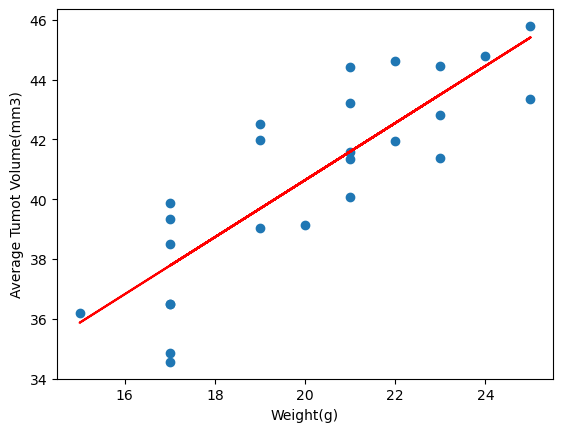

In [187]:
# Calculate the correlation coefficient and a linear regression model
correlation = st.pearsonr(mouse_weight,tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = mouse_weight
y_values = tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# # Print the results
# print(f"Slope: {slope}")
# print(f"Intercept: {intercept}")
# print(f"R-Value: {rvalue}")
# print(f"P-Value: {pvalue}")
# print(f"Standard Error: {stderr}")

# Plot regression line
regress_values = mouse_weight * slope + intercept
# equation line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Graph
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumot Volume(mm3)")
plt.show()